In [1]:
# Block 1: Install and Import
!pip install gensim scikit-learn matplotlib
import nltk
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Download the necessary language packs
nltk.download('punkt')
nltk.download('punkt_tab')
print("Tools are ready! ✅")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 26.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Tools are ready! ✅


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [2]:
# Block 2: Create our "Corpus" (The Library)
corpus = [
    "Natural language processing is a fascinating field",
    "Word embeddings capture semantic meanings",
    "NLP is used in chatbots and virtual assistants",
    "Word2Vec is a powerful tool for creating word embeddings",
    "Computers use math to understand language",
    "Artificial intelligence is changing the world"
]

# Chop the sentences into individual words (Tokenization)
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

print("Here is what the robot sees:")
print(tokenized_corpus)

Here is what the robot sees:
[['natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field'], ['word', 'embeddings', 'capture', 'semantic', 'meanings'], ['nlp', 'is', 'used', 'in', 'chatbots', 'and', 'virtual', 'assistants'], ['word2vec', 'is', 'a', 'powerful', 'tool', 'for', 'creating', 'word', 'embeddings'], ['computers', 'use', 'math', 'to', 'understand', 'language'], ['artificial', 'intelligence', 'is', 'changing', 'the', 'world']]


In [3]:
# Block 2: Create our "Corpus" (The Library)
corpus = [
    "Natural language processing is a fascinating field",
    "Word embeddings capture semantic meanings",
    "NLP is used in chatbots and virtual assistants",
    "Word2Vec is a powerful tool for creating word embeddings",
    "Computers use math to understand language",
    "Artificial intelligence is changing the world"
]

# Chop the sentences into individual words (Tokenization)
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

print("Here is what the robot sees:")
print(tokenized_corpus)

Here is what the robot sees:
[['natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field'], ['word', 'embeddings', 'capture', 'semantic', 'meanings'], ['nlp', 'is', 'used', 'in', 'chatbots', 'and', 'virtual', 'assistants'], ['word2vec', 'is', 'a', 'powerful', 'tool', 'for', 'creating', 'word', 'embeddings'], ['computers', 'use', 'math', 'to', 'understand', 'language'], ['artificial', 'intelligence', 'is', 'changing', 'the', 'world']]


In [4]:
# Block 3: Train the Model
# vector_size=100 means every word gets 100 numbers to describe it
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Save our hard work
model.save("word2vec.model")
print("Model trained and saved! 🧠")

# Let's peek at the math for the word 'nlp'
vector = model.wv['nlp']
print(f"The math for 'nlp' looks like this (first 10 numbers): {vector[:10]}")

Model trained and saved! 🧠
The math for 'nlp' looks like this (first 10 numbers): [-0.00696361 -0.00245851 -0.00802294  0.00750053  0.00612742  0.00525847
  0.00837786 -0.00069653 -0.00931273  0.00911567]


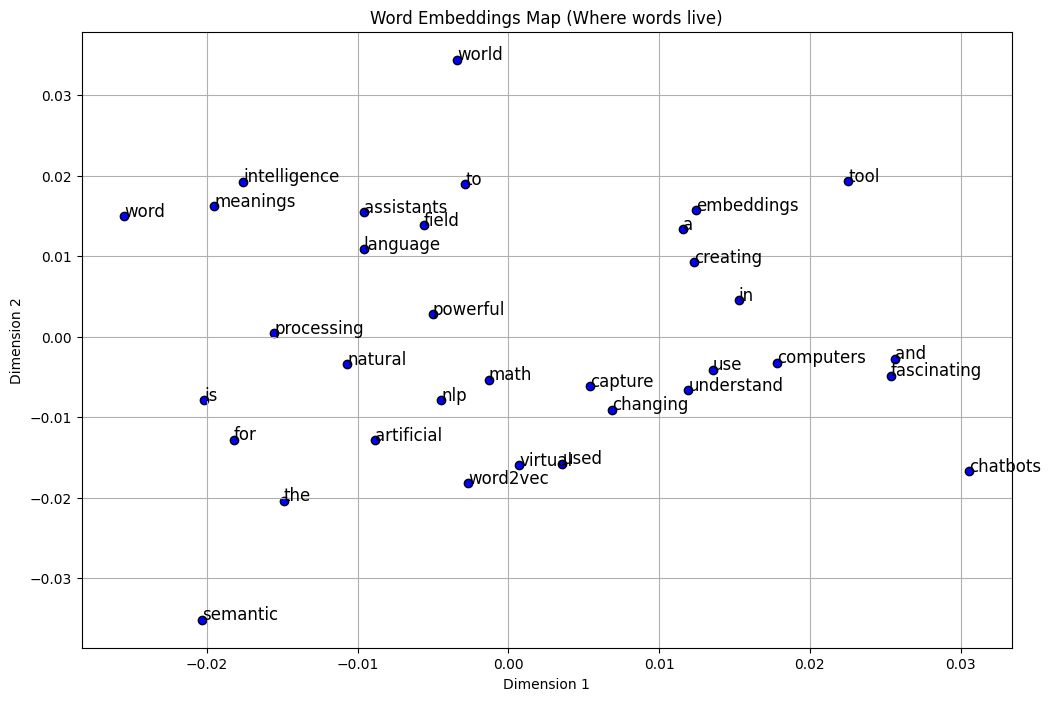

In [5]:
# Block 4: Draw the 2D Map
# Get the words from the model
words = list(model.wv.index_to_key)
word_vectors = [model.wv[word] for word in words]

# Squash 100 dimensions down to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolors='k')

# Write the words on the map
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), fontsize=12)

plt.title("Word Embeddings Map (Where words live)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()